In [ ]:
import requests
import numpy as np
%pip install netCDF4

#importing netCDF file handling module
from netCDF4 import Dataset
data=Dataset('/content/drive/MyDrive/RF25_ind2023_rfp25.nc')

# Displaying the names of the variables
print(data.variables.keys())

# Accessing the variables
LONGITUDE = data.variables['LONGITUDE']
print(LONGITUDE)

LATITUDE = data.variables['LATITUDE']
print(LATITUDE)

time1 = data.variables['TIME']
print(time1)

precipitation = data.variables['RAINFALL']
print(precipitation)

# Accessing the data from the variables
time_data = data.variables['TIME'][:]
print(time_data)

LONGITUDE_data = data.variables['LONGITUDE'][:]
print(LONGITUDE_data)

LATITUDE_data = data.variables['LATITUDE'][:]
print(LATITUDE_data)

In [ ]:
#extracting data for particular cordinates
%pip install pandas
from netCDF4 import Dataset
import numpy as np
import pandas as pd
for i in range(1980, 2024):
     data=Dataset('/content/drive/MyDrive/RF25_ind'+str(i)+'_rfp25.nc')
     # Storing the LATITUDE and LONGITUDE data into the variables
     LATITUDE = data.variables['LATITUDE'][:]
     LONGITUDE = data.variables['LONGITUDE'][:]

     # Storing the LATITUDE and LONGITUDE of into variables
     LATITUDE_dehradun =  location.latitude
     LONGITUDE_dehradun = location.longitude

     # Squared difference of LATITUDE and LONGITUDE
     sq_diff_LATITUDE = (LATITUDE - LATITUDE_dehradun)**2
     sq_diff_LONGITUDE = (LONGITUDE - LONGITUDE_dehradun)**2

     # Identifying the index of the minimum value for LATITUDE and LONGITUDE
     min_index_LATITUDE = sq_diff_LATITUDE.argmin()
     min_index_LONGITUDE = sq_diff_LONGITUDE.argmin()

     precipitation= data.variables['RAINFALL']

     # Creating an empty pandas dataframe
     starting_date = '1-1-'+data.variables['RAINFALL'].history[8:12]
     print(starting_date)
     ending_date = '31-12-'+data.variables['RAINFALL'].history[8:12]
     print(ending_date)
     date_range = pd.date_range(start = starting_date, end = ending_date)
     df = pd.DataFrame(0, columns = ['precipitation'], index = date_range)

     dt = np.arange(0, data.variables['TIME'].size)

     for time_index in dt:
         df.iloc[time_index] = precipitation[time_index,min_index_LATITUDE ,min_index_LONGITUDE]

     # Saving the time series into a csv
     df.to_csv('temparature_dehradun'+str(i)+'.csv')

In [4]:
data = pd.read_csv("/content/POWER_Regional_Daily_19810201_19820201_028d4497N_031d1389N_077d3883E_081d3168E_LST.csv")

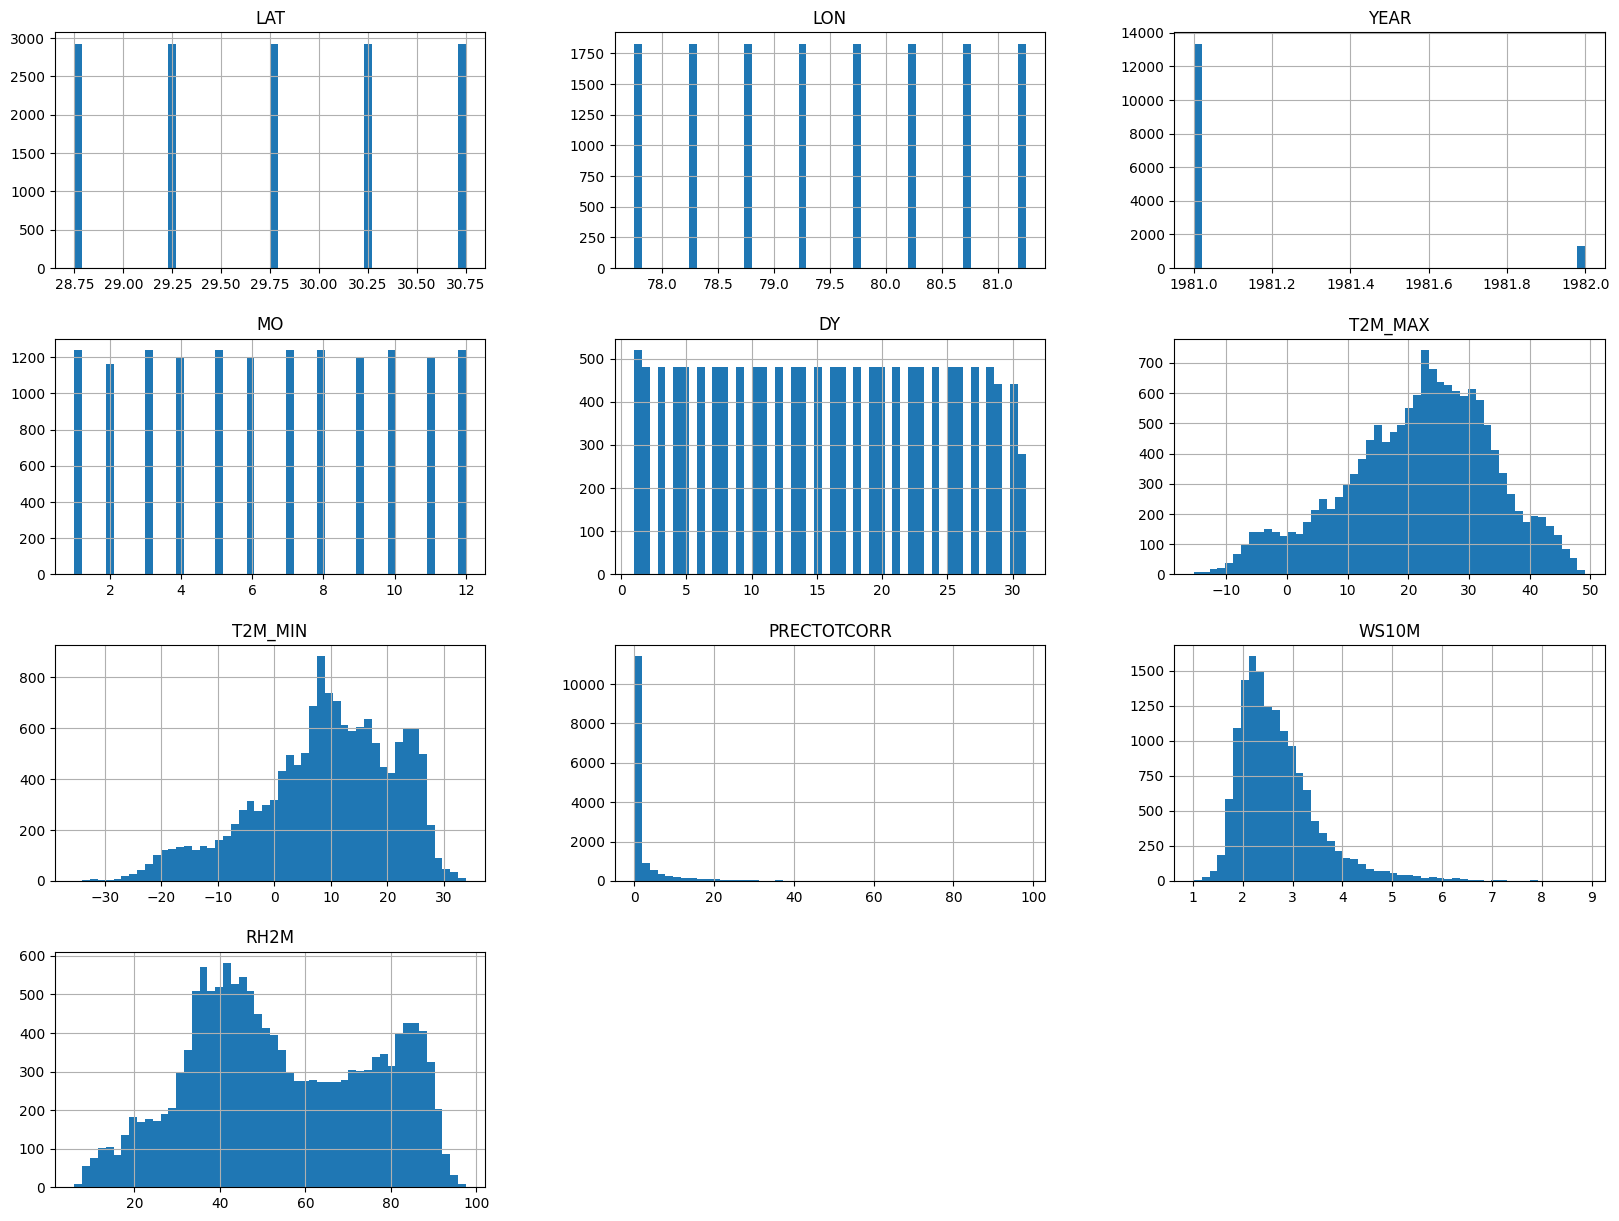

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize = (20,15))
plt.show()

In [ ]:
#plotting data into map

%pip install basemap
%pip install netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = Dataset('/content/drive/MyDrive/APHRO_MA_025deg_V1901.1998.nc')

LATITUDEs = data.variables['LATITUDE'][:]
LONGITUDEs = data.variables['LONGITUDE'][:]
time = data.variables['time'][:]
precip = data.variables['precip'][:]

mp = Basemap(projection = 'merc',
             llcrnrLONGITUDE = 68.251680,
             llcrnrLATITUDE = 6.487972,
             urcrnrLONGITUDE = 98.085078,
             urcrnrLATITUDE = 34.994298,
             resolution = 'i')

LONGITUDE, LATITUDE = np.meshgrid(LONGITUDEs, LATITUDEs)
x,y = mp(LONGITUDE, LATITUDE)

c_scheme = mp.pcolor(x, y, np.squeeze(precip[220,:,:]), cmap = 'jet')
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')

plt.title('Average precipitation on 08-08-1998')
plt.show()


In [ ]:
#making animation of data

%pip install basemap
%pip install netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = Dataset('/content/drive/MyDrive/APHRO_MA_025deg_V1901.1998.nc')

LATITUDEs = data.variables['LATITUDE'][:]
LONGITUDEs = data.variables['LONGITUDE'][:]
time = data.variables['time'][:]
precip = data.variables['precip'][:]

mp = Basemap(projection = 'merc',
             llcrnrLONGITUDE = 68.251680,
             llcrnrLATITUDE = 6.487972,
             urcrnrLONGITUDE = 98.085078,
             urcrnrLATITUDE = 34.994298,
             resolution = 'i')

LONGITUDE, LATITUDE = np.meshgrid(LONGITUDEs, LATITUDEs)
x,y = mp(LONGITUDE, LATITUDE)

days = np.arange(0, 10)

for i in days:

    c_scheme = mp.pcolor(x, y, np.squeeze(precip[i,:,:]), cmap = 'jet')
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()

    cbar = mp.colorbar(c_scheme, location = 'right', pad = '10%')
    day = i+1

    plt.title('Average Precipitation: Day ' + str(day) + ' of Year 1998' )
    plt.clim(0, 70)
    plt.savefig(r'/content/drive/MyDrive/animation'+'\\'+ str(day)+'.jpg')
    plt.clf()

In [ ]:
#making gif
%pip install Pillow
import PIL
import numpy as np

image_frames = []

days = np.arange(1,366)
image_frames = []
for k in days:
    new_frame = PIL.Image.open('/content/drive/MyDrive/animation/animation\\'+str(k)+'.jpg')
    image_frames.append(new_frame)
image_frames[0].save('animation.gif', format='GIF', save_all=True, append_images=image_frames[1:], duration=150, loop=0)